<a href="https://colab.research.google.com/github/Namithakrt/SentimentAnalysis/blob/main/movie_reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import nltk
from nltk.corpus import movie_reviews
from nltk.tokenize import word_tokenize
from nltk.sentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt

In [ ]:
nltk.download('punkt')
nltk.download('vader_lexicon')
nltk.download('movie_reviews')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!


True

In [ ]:
#load movie review dataset
reviews=[]
for file_id in movie_reviews.fileids():
  review=movie_reviews.raw(file_id)
  reviews.append(review)

In [ ]:
#sentiment analysis
analyzer=SentimentIntensityAnalyzer()

In [ ]:
# counters for positive,negative and neutral reviews
positive_count=0
negative_count=0
neutral_count=0

In [ ]:
#analyze each reviews
for review in reviews:
  # tokenize review
  words=word_tokenize(review.lower())

  #sentiment analysis
  sentiment_score=analyzer.polarity_scores(' '.join(words))
  #determine sentiment
  if sentiment_score['compound']>=0.05:
    positive_count+=1
  elif sentiment_score['compound']<=0.05:
    negative_count+=1
  else:
    neutral_count+=1

In [ ]:
total_reviews=len(reviews)
positive_ratio= positive_count/total_reviews
negative_ratio=negative_count/total_reviews
neutral_ratio=neutral_count/total_reviews

In [ ]:
#determine which sentiment is more relevent
if positive_ratio>negative_ratio:
  overall_sentiment="positive"
elif positive_ratio<negative_ratio:
  overall_sentiment='negative'
else:
  overall_sentiment='neutral'

In [ ]:
print("sentiment analysis results:")
print(f"total number of reviews: {total_reviews}")
print(f"number of positive reviews:{positive_count}")
print(f"number of negative reviews:{negative_count}")
print(f"number of neutral reviews:{neutral_count}")
print(f"positive ratio:{positive_ratio:2f}")
print(f"negative ratio:{negative_ratio:2f}")
print(f"neutral ratio:{neutral_ratio:2f}")
print(f"overall sentiment:{overall_sentiment}")


sentiment analysis results:
total number of reviews: 2000
number of positive reviews:1380
number of negative reviews:620
number of neutral reviews:0
positive ratio:0.690000
negative ratio:0.310000
neutral ratio:0.000000
overall sentiment:positive


In [ ]:
labels=['positive','negative','neutral']
sizes=[positive_count,negative_count,neutral_count]

In [ ]:
colors=['navy','darkred','darkgreen']

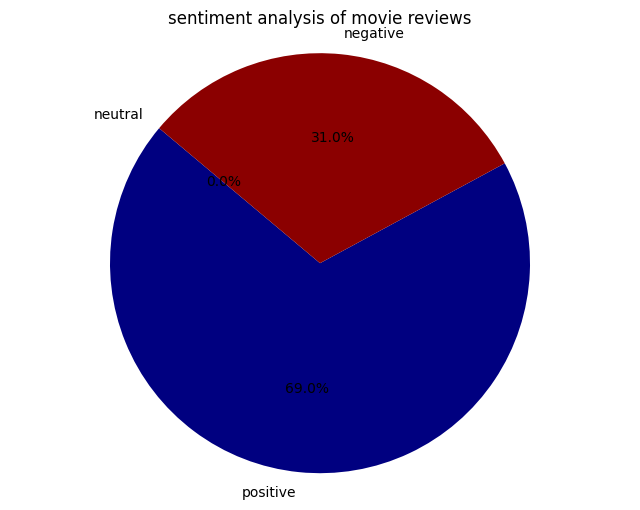

In [ ]:
plt.figure(figsize=(8,6))
plt.pie(sizes,labels=labels,colors=colors,autopct='%1.1f%%',startangle=140)
plt.title('sentiment analysis of movie reviews')
plt.axis('equal')
plt.show()

In [ ]:
colors=['royalblue','darkorange','forestgreen']

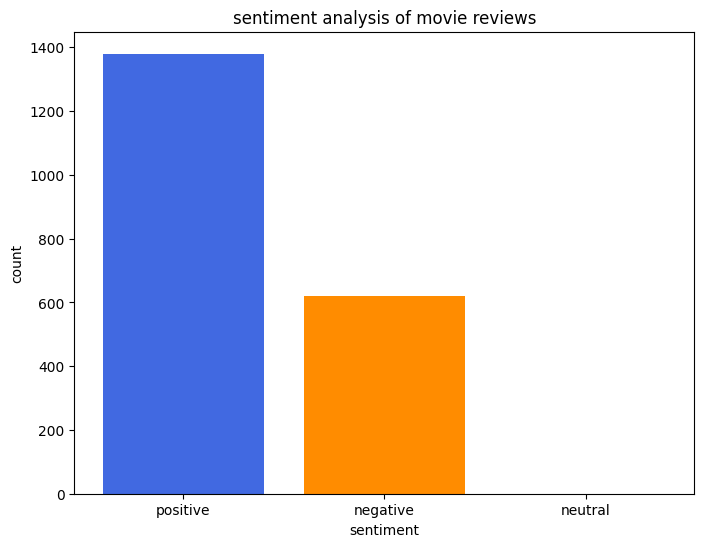

In [ ]:
plt.figure(figsize=(8,6))
plt.bar(labels,sizes,color=colors)
plt.title('sentiment analysis of movie reviews')
plt.xlabel('sentiment')
plt.ylabel('count')
plt.show()